# Árboles de decisión y EDA
La clase pasada estuvimos viendo un poco de estadística y EDA (exploratory data analysis).

La primer mitad vamos a trabajar con el dataset de flores iris y la segunda mitad es para que ustedes trabajen con el dataset breast-cancer-wisconsin.data

## Iris

Iris es un dataset clásico para aquellos incursionando en el campo de Machine Learning. Se trata de una colección de 150 flores que deben ser categorizadas en 3 clases (Setosa, Versicolor, Virginica). Esto debe realizarse a partir de medidas tomadas sobre cada flor.


Abajo comenzamos explorando el dataset y dejamos algunas tareas para que ustedes completen a medida que van avanzando. 

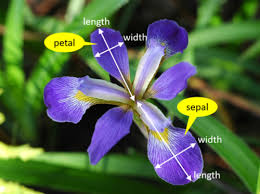



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_dataset.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Explorar el dataset

Lo primero que vamos a tener que hacer es cargar el dataset en un dataframe

In [3]:
#cargamos data al dataframe
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
#le agregamos el target
df['target'] = iris_dataset['target']

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Plotting some features

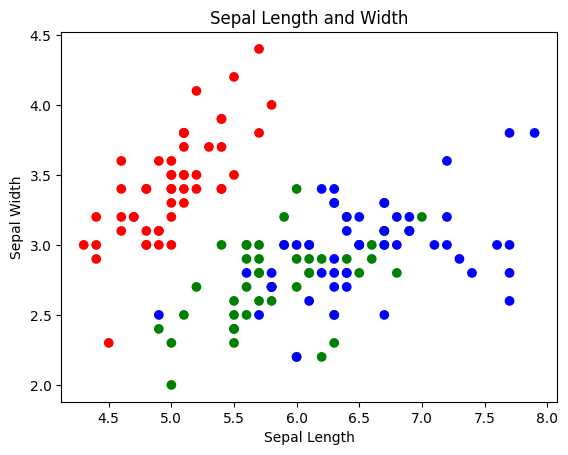

In [9]:
colors = np.array(["r", "g", "b"])
plt.scatter(iris_dataset.data[:, 0], iris_dataset.data[:, 1], color=colors[iris_dataset.target])
plt.title("Sepal Length and Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

### Ejercicio 1
Grafique el largo y ancho de los pétalos 

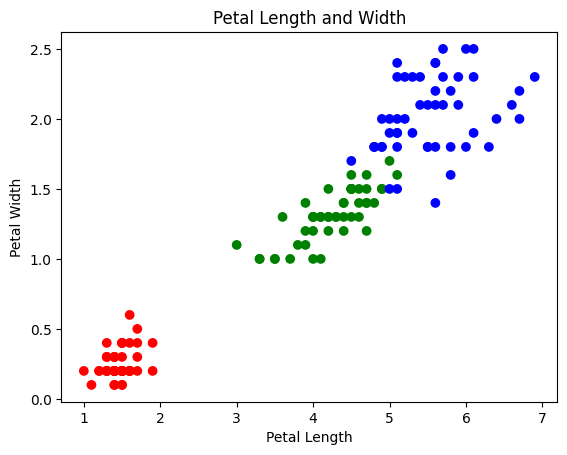

In [22]:
colors = np.array(["r", "g", "b"])
plt.scatter(iris_dataset.data[:, 2], iris_dataset.data[:, 3], color=colors[iris_dataset.target])
plt.title("Petal Length and Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

¿Qué puede observar en ambas gráficas respecto a las tres clases? ¿Qué conclusiones puede tomar?


Hay una clara relacion entre el petal length y el petal widht:

-> a mayor petal lenght mayor petal width


-> Es claro el tamaño de las flores, osea que flor es mas grande

# Clasificación

Para este problema de ejemplo vamos a entrenar un modelo sencillo basado en [Árboles de Decisión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Los árboles de decisión son algoritmos de Machine Learning supervisado. Se construye un arbol binario (cada nodo tiene dos ramas). Los valores objetivos se presentan en las hojas de los árboles.

Antes de poder llegar a eso debemos dividir el dataset en conjuntos adecuados para **entrenar** y **testar** el modelo.


### Ejercicio 2

¿Por qué debemos separar el set de datos? Es decir, ¿por qué no podemos validar el resultado con los mismos datos con los que entrenamos?

## Split train-test

Usando sklearn separamos el dataset (y los targets) iniciales en dos: un set de entrenamiento y uno de test.


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop('target', axis=1),
    df['target'],
    test_size=(1.0/3), random_state=42)

print(f'df shape = {df.shape}')
print('------------------------')
print(f'X_train shape = {X_train.shape}\n------------------------')
print(f'Y_train shape = {Y_train.shape}\n------------------------')
print(f'X_test shape = {X_test.shape}\n------------------------')
print(f'Y_test shape = {Y_test.shape}')

df shape = (150, 5)
------------------------
X_train shape = (100, 4)
------------------------
Y_train shape = (100,)
------------------------
X_test shape = (50, 4)
------------------------
Y_test shape = (50,)


Una vez separados los datos podemos crear un modelo y entrenarlo. Para ello, necesitamos un objeto de la clase `DecisionTreeClassifier`.

Una vez creado el mismo, llamamos al método `fit` con los datos de entrenamiento para entrenarlo y luego podemos usar los métodos predict para obtener predicciones de las clases para los datos de test.


Entrenamiento de un árbol de decisión de profundidad máxima 3 para clasificar los datos

Recuerden que pueden acceder a la documentación [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)


In [24]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier(max_depth=3, criterion = 'entropy')

# Hacemos el fit
arbol.fit(X_train, Y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Plotting the Decision Tree

[Text(0.375, 0.875, 'petal length (cm) <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]\nclass = versicolor'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]\nclass = versicolor'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal length (cm) <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]\nclass = versicolor'),
 Text(0.125, 0.125, 'entropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]\nclass = versicolor'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\nentropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]\nclass = virginica'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 28]\nclass = virginica')]

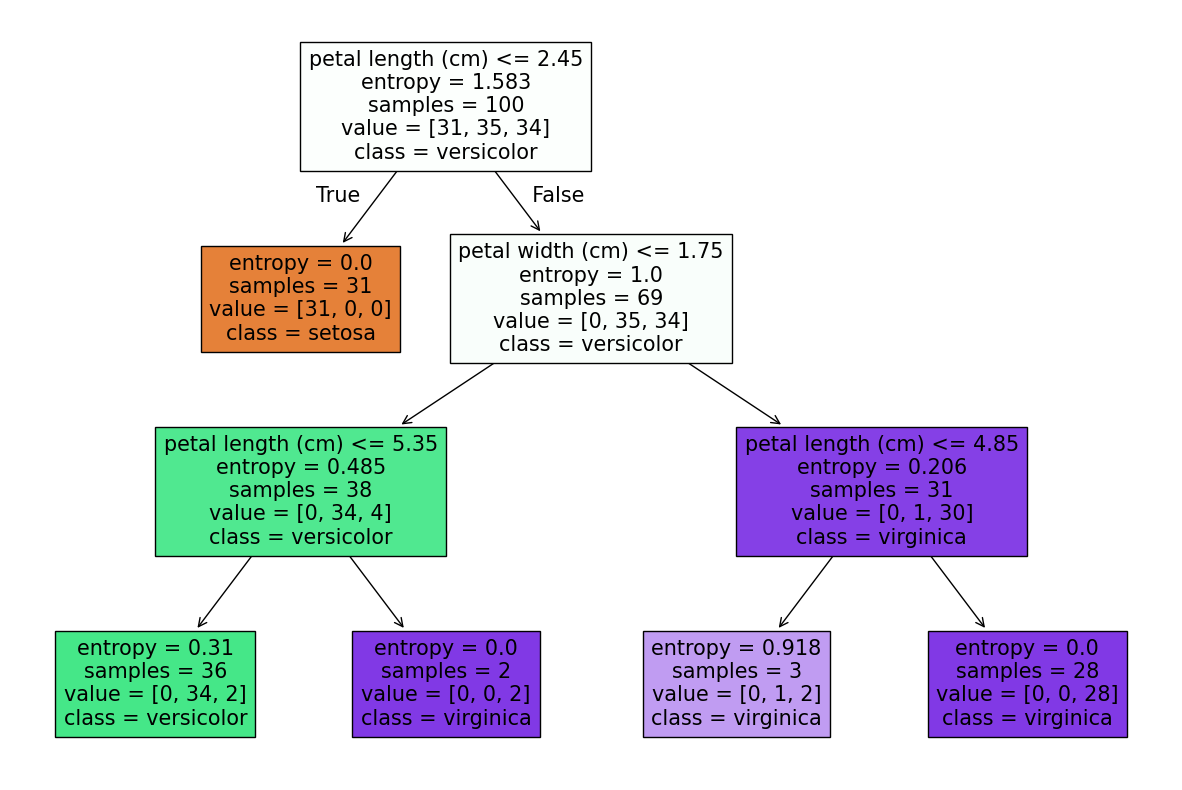

In [25]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
tree.plot_tree(arbol, 
                   feature_names=iris_dataset.feature_names,  
                   class_names=iris_dataset.target_names,
                   filled=True,)

In [26]:
fig.savefig("decision_tree.png")

### Ejercicio 3

La accuracy es el porcentaje de datos que fueron clasificados correctamente

¿Cuál fue la accuracy de los datos de test?


In [27]:
from sklearn.metrics import accuracy_score

Y_pred_test = arbol.predict(X_test)
print("Accuracy de datos de test:", accuracy_score(Y_pred_test, Y_test))

Accuracy de datos de test: 0.98


### Ejercicio 4

Armar un arbol de altura máxima 2 ¿Cuál de los dos es mejor?

In [ ]:
#arbol2 = ...


Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred1 = arbol.predict(X_test)
Y_pred2 = arbol2.predict(X_test)
print("Confusion Matrix Arbol 1")       
print(confusion_matrix(Y_test, Y_pred1))
print("Confusion Matrix Arbol 2")       
print(confusion_matrix(Y_test, Y_pred2))
print("--------------------------------")
print("Classification report Arbol 1")
print(classification_report(Y_test, Y_pred1, target_names = iris_dataset["target_names"]))
print(classification_report(Y_test, Y_pred2, target_names = iris_dataset["target_names"]))

También podemos imprimir la matriz de confusión más linda haciendo un plot

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, Y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Breast Cancer Wisconsin

El dataset de Iris es muy sencillo y muy fácilmente podemos obtener 100% de precisión con un modelo simple. La tarea siguiente implica el uso de un dataset real para el cual van a tener que entrenar un Árbol de decisión para detectar cáncer de mama a partir de distintas mediciones. 

La descripción del dataset la pueden encontrar aquí: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

Cargamos el nuevo df

In [ ]:
# breast_cancer_df = pd...

Si hacemos `breast_cancer_df.head()` podemos ver que las columnas no tienen nombre

In [ ]:
breast_cancer_df.head()

Le podemos agregar el nombre a las columnas

In [ ]:
breast_cancer_df.columns = ["Id", "clump_thicknes", "cell_size", "cell_shape", "adhesion", "epithelial_cell_size", "nuclei", "chromatin", "nucleoli", "mitoses", "target"]
breast_cancer_df.head()

In [ ]:
# En el dataset las clases son 2 y 4 que representan Benigno y Maligno, vamos a reemplazarlas por 0 y 1 por simplicidad.
breast_cancer_df["target"].replace(2, 0, inplace=True)
breast_cancer_df["target"].replace(4, 1, inplace=True)

# Opcion A) Eliminamos la columna de ID ya que no nos interesa
breast_cancer_df.drop(columns="Id", inplace=True)

# Opcion B) Hacemos que el ID sea el Index
#breast_cancer_df.set_index("Id", inplace = True)
breast_cancer_df.head()


In [ ]:
# Finalmente, contamos cuantos ejemplos son beningnos y cuantos no (0 = B, 1 = M)
breast_cancer_df["target"].value_counts()

In [ ]:
breast_cancer_df["nuclei"].value_counts()

In [ ]:
breast_cancer_df[breast_cancer_df["nuclei"]=='?']

In [ ]:
#Quitamos observaciones que tienen '?' en Nuclei quantity
breast_cancer_df.drop(breast_cancer_df[breast_cancer_df["nuclei"]=='?'].index, inplace = True)

### Ejercicio 6

Realice una exploración del dataset como hicimos para el caso de Iris.

### Ejercicio 7

Entrene al menos 2 arboles de Decisión para este set de datos. Recuerde separar los datos en conjuntos de entrenamiento y test.

### Ejercicio 8
¿Cuál de los árboles es el mejor?
Imprima la matriz de confusión del mejor modelo